# <b>Modeling</b>

## <b>SIR Model</b>

We are going to use the SRI model with differential equation:<br>
#### We assume that at a given time $t$ the total population N consist of:
      1. Susceptible individual (not infected), denoted $S$
      2. Infected individual, denoted $I$
      3. Removed individual (dead or recovered), denoted $R$
these three classes satisfy:  
$$S + I + R = N$$ <br>
where $N$ is supposed to be constant. The differential equations which govern the system are:<br> <br>
$$\begin{align}
\frac{dS}{dt} &= -\frac{aSI}{N}\\
\frac{dI}{dt} &= \frac{aSI}{N}-bI\\
\frac{dR}{dt} &= b I
\end{align}$$
where $a$ is the infection factor and $b$ is the removal factor.

#### <b> Finding the infection factor a and the removal factor b.

Suppose we know $\large \frac{dS}{dt}$ together with $S$ and $I$ at time $t$, then
$$a = - \frac{N}{SI}\, \frac{dS}{dt}$$<br>

<p>We may assume $\large \frac{dI}{dt}$ is the number of daily new cases. However, there is no straightforward data for $\large \frac{dS}{dt}$.<br>
What we know is the number of new deaths and new recovered cases, that is $\large \frac{dR}{dt}$. Therefore we are going to use:<br><br>
$$ \frac{dS}{dt} = -\; \left(\frac{dI}{dt} + \frac{dR}{dt}\right) $$
</p>
For the removal factor $b$, we may use:
$$b = \; \frac{1}{I}\; \frac{dR}{dt}$$


Concerning the values of $N$ and $S$, for simplicity we will assume that $N$ is either a fix percentage of the population or the cumulative number of tests (we will decide later). For $S$, we will assume<br><br>
$$S = \text{$S$ from previous day} \; + \; \text{rate on change in $S$} $$

In [1]:
%matplotlib inline

from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import seaborn

import pandas

import numpy as np
from scipy import integrate

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Slider, NumeralTickFormatter
from bokeh.layouts import column, row #to remove
from bokeh.io import output_notebook, push_notebook
from bokeh.palettes import Spectral4
from bokeh.models.tools import HoverTool


output_notebook()

Loading BokehJS ...

### <b>Loading the data</b>

In [2]:
# newly recovered
df_daily_reco = pandas.read_csv('../data/processed/time_series_daily_recovered.csv', skipinitialspace=True)
# new deaths
df_daily_deaths = pandas.read_csv('../data/processed/time_series_daily_deaths.csv', skipinitialspace=True)
# new active cases
df_daily_active = pandas.read_csv('../data/processed/time_series_daily_active.csv', skipinitialspace=True)
# new cases
df_daily_new = pandas.read_csv('../data/processed/time_series_daily_new.csv', skipinitialspace=True)

In [3]:
df_daily_reco['date'] = pandas.to_datetime(df_daily_reco['date'], format='%Y-%m-%d')
df_daily_deaths['date'] = pandas.to_datetime(df_daily_deaths['date'], format='%Y-%m-%d')
df_daily_active['date'] = pandas.to_datetime(df_daily_active['date'], format='%Y-%m-%d')
df_daily_new['date'] = pandas.to_datetime(df_daily_new['date'], format='%Y-%m-%d')

In [4]:
# total active cases
df_active = pandas.read_csv('../data/processed/time_series_active.csv', skipinitialspace=False)
df_active['date'] = pandas.to_datetime(df_active['date'], format='%Y-%m-%d')

### <b>We will compute b (removal factor) first</b>

#### <b>Case of China</b>

We are going to find a time serie distribution of $a$ and $b$ based on the data from China.<br>
We will assume that for a day $t$:
$$\frac{dI}{dt} = \text{number of new cases}$$
$$\frac{dR}{dt} = \text{number of new deaths}\; + \; \text{number of new recovered}$$<br> <br>
Recall &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  $\displaystyle b = \; \frac{1}{I}\; \frac{dR}{dt}$


In [5]:
def removal_factor(country):
    ''' This function computes the removal rate and removal factor, b, for the input country
    Parameters:
    -----------
          country (str): country name
    Returns:
    --------
        df_b (pandas.DataFrame): pandas data frame with columns: "date", "removal rate" and "b"'''
    df_b = pandas.DataFrame()
    df_b['date'] = df_daily_new['date']
    df_b['removal rate'] = df_daily_deaths[country] + df_daily_reco[country]
    df_b['b'] =  df_b['removal rate'] / df_active[country]
    
    return df_b

In [6]:
df_b_china = removal_factor('China')

In [7]:
df_b_china

,date,removal rate,b
0,2020-01-22,45,0.089463
1,2020-01-23,3,0.005042
2,2020-01-24,14,0.016317
3,2020-01-25,19,0.014340
4,2020-01-26,24,0.012183
...,...,...,...
312,2020-11-29,30,0.027959
313,2020-11-30,19,0.016637
314,2020-12-01,34,0.028357
315,2020-12-02,51,0.040221


<AxesSubplot:xlabel='b'>

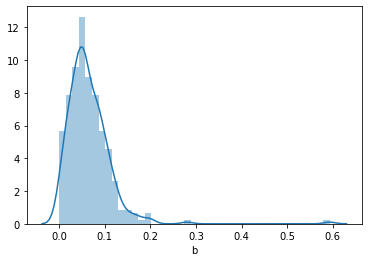

In [8]:
seaborn.distplot(df_b_china['b'])

<AxesSubplot:>

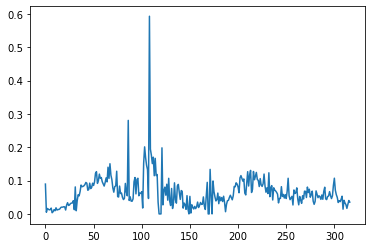

In [9]:
df_b_china['b'].plot()

In [10]:
b_stat_china = df_b_china.describe()

In [11]:
b_stat_china

,removal rate,b
count,317.000000,317.000000
mean,289.880126,0.065042
std,646.042827,0.049715
min,0.000000,0.000000
25%,19.000000,0.035503
50%,40.000000,0.055925
75%,133.000000,0.085335
max,4200.000000,0.592920


#### <b>Case of South Korea</b>
We will look at South Korea case to get more insight.

In [12]:
df_b_skorea = removal_factor('Korea, South')

In [13]:
df_b_skorea

,date,removal rate,b
0,2020-01-22,0,0.000000
1,2020-01-23,0,0.000000
2,2020-01-24,0,0.000000
3,2020-01-25,0,0.000000
4,2020-01-26,0,0.000000
...,...,...,...
312,2020-11-29,114,0.018931
313,2020-11-30,232,0.037174
314,2020-12-01,180,0.027389
315,2020-12-02,290,0.042510


<AxesSubplot:xlabel='b'>

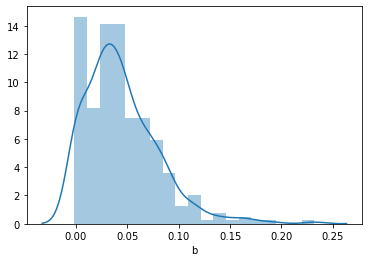

In [14]:
seaborn.distplot(df_b_skorea['b'])

<AxesSubplot:>

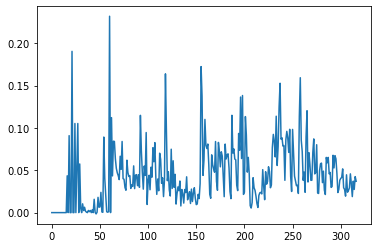

In [15]:
df_b_skorea['b'].plot()

In [16]:
b_stat_skorea = df_b_skorea.describe()

In [17]:
b_stat_skorea

,removal rate,b
count,317.000000,317.000000
mean,91.946372,0.044549
std,119.892833,0.036132
min,-11.000000,-0.001539
25%,21.000000,0.021505
50%,60.000000,0.038278
75%,121.000000,0.063675
max,1378.000000,0.231947


#### <b>Case of Germany</b>

In [18]:
df_b_germany = removal_factor('Germany')

In [19]:
df_b_germany

,date,removal rate,b
0,2020-01-22,0,NaN
1,2020-01-23,0,NaN
2,2020-01-24,0,NaN
3,2020-01-25,0,NaN
4,2020-01-26,0,NaN
...,...,...,...
312,2020-11-29,12318,0.039917
313,2020-11-30,18810,0.061875
314,2020-12-01,20644,0.067000
315,2020-12-02,20666,0.066508


<AxesSubplot:xlabel='b'>

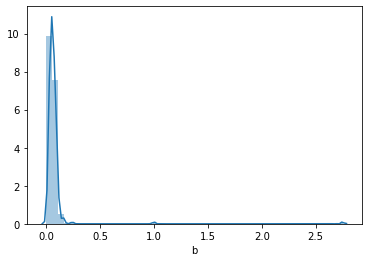

In [20]:
seaborn.distplot(df_b_germany['b'])

<AxesSubplot:>

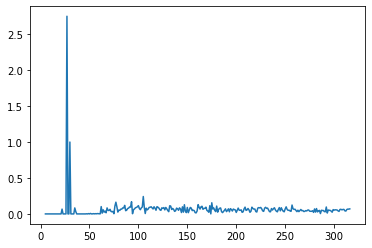

In [21]:
df_b_germany['b'].plot()

In [22]:
b_stat_germany = df_b_germany.describe()

In [23]:
b_stat_germany

,removal rate,b
count,317.000000,312.000000
mean,2615.735016,0.062944
std,4547.773041,0.165694
min,0.000000,0.000000
25%,260.000000,0.027432
50%,883.000000,0.051262
75%,2393.000000,0.075641
max,22506.000000,2.750000


### <b>Compute a (infection factor)</b>
<br> Recall that: &nbsp;  &nbsp;  &nbsp;  &nbsp;
$\displaystyle a = - \frac{N}{SI}\, \frac{dS}{dt}$<br> <br>
$\displaystyle S = \text{$S$ from previous day} \; + \; \text{change in $S$} $<br> <br>
$\displaystyle \frac{dS}{dt} = -\; \left(\frac{dI}{dt} + \frac{dR}{dt}\right) $


<b>We define a function which computes the infectino factor for a given country and population size $N$.<br>
$N$ does not have to be the real population size of the country but rather the number of people relevant for the study.</b>

In [24]:
def infection_factor(country, N):
    ''' This function computes the infection factor, a, for the input country
    Parameters:
    -----------
          country (str): country name.
          N (int): the relevant population size for the study.
    Returns:
    --------
        df_a (pandas.DataFrame): pandas data frame with columns: "date", and "a"
    '''
    #S0 (int): initial number of susceptible individual (day 0)
    # for simplicity we will assume that
    # S0 = N - initally infected individuals (i.e at day 0) - initial removed individuals (i.e at day 0)
    
    S0 = N - df_active[country][0] -  df_daily_deaths[country][0] - df_daily_reco[country][0]
    
    list_of_s = [S0]
    
    
    df_a = pandas.DataFrame()
    df_a['date'] = df_daily_new['date']
    df_a['dSdt'] = -(df_daily_new[country] + df_daily_deaths[country] + df_daily_reco[country])
    
    # computing the values of S
    for i in range(1,df_daily_new.shape[0]):
        list_of_s.append(list_of_s[i-1] + df_a['dSdt'][i])
        
    df_a['S'] = list_of_s
    
    # computing the infection factor a
    df_a['a'] = - (N*df_a['dSdt']) / (df_active[country] * df_a['S'])
    
    return df_a

### Case of China

In [25]:
df_a_china = infection_factor('China', 300000000)
# we will use 300 million as population number
# we arbitrarily assume than only about 25% of China population is relevant for the study 
# as about 40% of the population reside in rural area and we arbitrarily assume that
#the other 35% have been sufficiently isolated.

In [26]:
df_a_china

,date,dSdt,S,a
0,2020-01-22,-593,299999452,1.178929
1,2020-01-23,-98,299999354,0.164706
2,2020-01-24,-291,299999063,0.339162
3,2020-01-25,-505,299998558,0.381134
4,2020-01-26,-693,299997865,0.351779
...,...,...,...,...
312,2020-11-29,-163,299815490,0.152004
313,2020-11-30,-107,299815383,0.093753
314,2020-12-01,-125,299815258,0.104318
315,2020-12-02,-171,299815087,0.134941


<AxesSubplot:xlabel='a'>

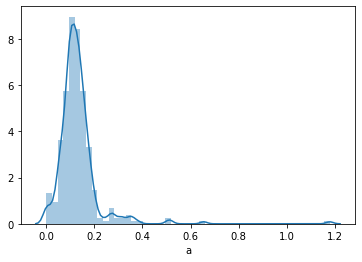

In [27]:
seaborn.distplot(df_a_china['a'])

<AxesSubplot:>

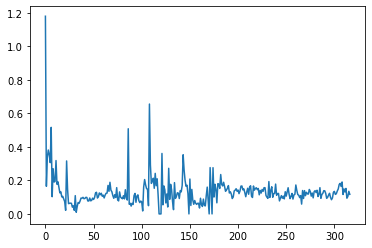

In [28]:
df_a_china['a'].plot()

In [29]:
a_stat_china = df_a_china.describe()

In [30]:
a_stat_china

,dSdt,S,a
count,317.000000,3.170000e+02,317.000000
mean,-583.952681,2.998430e+08,0.131978
std,1423.755753,4.260267e+04,0.093778
min,-16523.000000,2.998149e+08,0.000000
25%,-282.000000,2.998199e+08,0.093079
50%,-80.000000,2.998310e+08,0.120245
75%,-45.000000,2.998360e+08,0.151074
max,0.000000,2.999995e+08,1.178929


### Case of South Korea

In [31]:
df_a_skorea = infection_factor('Korea, South', 36190000)
# with similar reasoning as for China we choose 
# South Korea percentage of rural population is about 18.5%
# we arbitrarily assume 12.5% of urban population has been isolated  
# South Korea total population is about 51.7 millions
# that's why we choose 36190000 as our N parameter

In [32]:
df_a_skorea

,date,dSdt,S,a
0,2020-01-22,-1,36189999,1.000000
1,2020-01-23,0,36189999,0.000000
2,2020-01-24,-1,36189998,0.500000
3,2020-01-25,0,36189998,0.000000
4,2020-01-26,-1,36189997,0.333333
...,...,...,...,...
312,2020-11-29,-491,36127620,0.081675
313,2020-11-30,-683,36126937,0.109629
314,2020-12-01,-691,36126246,0.105329
315,2020-12-02,-830,36125416,0.121883


<AxesSubplot:xlabel='a'>

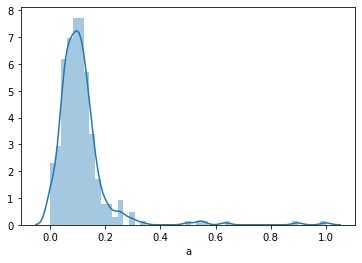

In [33]:
seaborn.distplot(df_a_skorea['a'])

<AxesSubplot:>

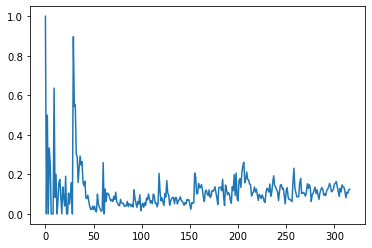

In [34]:
df_a_skorea['a'].plot()

In [35]:
a_stat_skorea = df_a_skorea.describe()

In [36]:
a_stat_skorea

,dSdt,S,a
count,317.000000,3.170000e+02,317.000000
mean,-206.558360,3.616278e+07,0.111940
std,197.651209,1.717619e+04,0.101248
min,-1540.000000,3.612452e+07,0.000000
25%,-286.000000,3.614782e+07,0.062730
50%,-138.000000,3.616553e+07,0.097436
75%,-74.000000,3.617222e+07,0.132367
max,0.000000,3.619000e+07,1.000000


### Case of Germany

In [37]:
df_a_germany = infection_factor('Germany', 53825000)
# Germany as a population of 83.02 millions
# 18.8 millions reside in rural area
# we arbitrarily assume another 12.5% of the population has been isolated  
# So we choose 36190000 as our N parameter

In [38]:
df_a_germany

,date,dSdt,S,a
0,2020-01-22,0,53825000,NaN
1,2020-01-23,0,53825000,NaN
2,2020-01-24,0,53825000,NaN
3,2020-01-25,0,53825000,NaN
4,2020-01-26,0,53825000,NaN
...,...,...,...,...
312,2020-11-29,-15515,52022206,0.052020
313,2020-11-30,-33031,51989175,0.112492
314,2020-12-01,-45410,51943765,0.152715
315,2020-12-02,-43941,51899824,0.146658


<AxesSubplot:xlabel='a'>

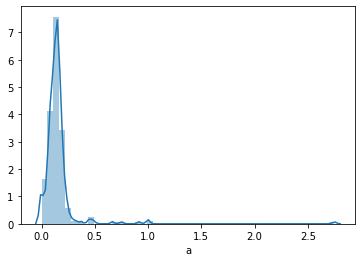

In [39]:
seaborn.distplot(df_a_germany['a'])

<AxesSubplot:>

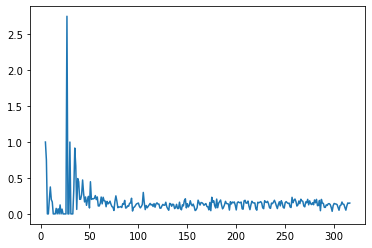

In [40]:
df_a_germany['a'].plot()

In [41]:
a_stat_germany = df_a_germany.describe()

In [42]:
a_stat_germany

,dSdt,S,a
count,317.000000,3.170000e+02,312.000000
mean,-6216.820189,5.339130e+07,0.154809
std,10397.222071,4.061566e+05,0.187813
min,-50368.000000,5.185427e+07,0.000000
25%,-6132.000000,5.331551e+07,0.094860
50%,-2006.000000,5.344368e+07,0.137415
75%,-840.000000,5.364615e+07,0.166869
max,0.000000,5.382500e+07,2.750001


### Deduction about the removal factor b and the infection factor a

In [43]:
parameter_stat = pandas.DataFrame()
parameter_stat['a mean'] = [a_stat_china['a']['mean'], a_stat_skorea['a']['mean'],  a_stat_germany['a']['mean']]
parameter_stat['a std'] = [a_stat_china['a']['std'], a_stat_skorea['a']['std'], a_stat_germany['a']['std']]
parameter_stat['b mean'] = [b_stat_china['b']['mean'], b_stat_skorea['b']['mean'],  b_stat_germany['b']['mean']]
parameter_stat['b std'] = [b_stat_china['b']['std'], b_stat_skorea['b']['std'], b_stat_germany['b']['std']]
parameter_stat = parameter_stat.rename({0: 'China', 1:'Korea, South', 2:'Germany'}, axis=0)

In [44]:
parameter_stat

,a mean,a std,b mean,b std
China,0.131978,0.093778,0.065042,0.049715
"Korea, South",0.111940,0.101248,0.044549,0.036132
Germany,0.154809,0.187813,0.062944,0.165694


The infection factor $a$ are close for the two countries in term of mean and standard deviation.<br>
For the removal factor $b$, the standard deviation is pretty close, around $0.04$ <br>
but the mean for China, $0.064$ is about twice the value for South Korea.

### We are going to take the average values for China and South Korea and use them as reference

In [45]:
sir_parameter = {item:  (parameter_stat[item]['China'] + parameter_stat[item]['Korea, South']) / 2
                 for item in parameter_stat.columns.values}

In [46]:
sir_parameter

{'a mean': 0.12195870908401499,
 'a std': 0.09751332903244213,
 'b mean': 0.05479558002430622,
 'b std': 0.042923182076842474}

In [47]:
# does not work, overflow error
#def normal_positive(mean, std, size=df_active.shape[0]):
#    dist = np.random.normal(mean,std,size)
#    while any(map(lambda x: x < 0, dist)):
#        dist = np.random.normal(mean,std,size)
#    return dist

#we are just going to take the absolute value
# Beware that by doing so, the distribution is no longer normal
def pseudo_normal(mean, std, size=df_active.shape[0]):
    '''Generate a distribution of size size from a normal distribution
    with mean mean and standard deviation std. The distribution is obtained
    by taking absolute value of the normal one.
    Parameters
    ----------
           mean (float): mean of the normal distribution
           std (float): standard deviation of the normal distribution
           size (int): size of the sample
    Returns
    -------
           list: list of all the samples.'''
    dist = np.random.normal(mean,std,size)
    return list(map(lambda x: abs(x), dist))

In [48]:
a_values = pseudo_normal(sir_parameter['a mean']-0.08,
                 sir_parameter['a std'],
                 )

b_values = pseudo_normal(sir_parameter['b mean'],
                 sir_parameter['b std'],
                 size=df_active.shape[0])

In [49]:
df_parameters = pandas.DataFrame()
df_parameters['a'] = a_values
df_parameters['b'] = b_values
df_parameters

,a,b
0,0.024311,0.005694
1,0.090628,0.029991
2,0.062823,0.044543
3,0.115588,0.050512
4,0.109077,0.051506
...,...,...
312,0.080326,0.068402
313,0.079595,0.058465
314,0.240407,0.016530
315,0.023513,0.054883


<AxesSubplot:>

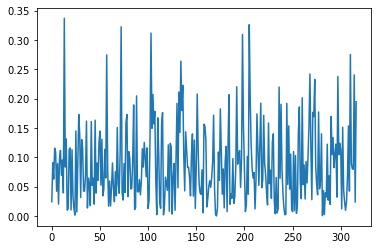

In [50]:
df_parameters['a'].plot()

In [51]:
df_parameters['a'].describe()

count    317.000000
mean       0.088272
std        0.067743
min        0.000115
25%        0.036096
50%        0.078405
75%        0.123812
max        0.337005
Name: a, dtype: float64

In [52]:
df_parameters['b'].describe()

count    317.000000
mean       0.060077
std        0.036029
min        0.000438
25%        0.031075
50%        0.058277
75%        0.084084
max        0.160709
Name: b, dtype: float64

## <b>Death factor</b>

<p><strong>We are going to introduce a death factor parameter which we will denote $k$.</strong><br>
We can consider the removed number $R$ to be the sum of the number of deaths $D$ and recovered $H$ (as in Healthy) cases. So</p><br>
<center>$\displaystyle R = H + D$</center><br>
in particuar if we set $\displaystyle k = \frac{D}{H+D}$ then<br>
<center>$\displaystyle R =  \left(1-\frac{D}{H+D}\right) R + \frac{D}{H+D} R = (1-k) R + k R$</center><br>
in such a way that $D= k R$ and $H = (1-k) R$.<br>
<p>To find an approximate for the value of $k$ we are going to use the data from China, South Korea and Germany to deduce a
    time series distribution using $\displaystyle k = \frac{D}{H+D}$.</p>

#### Loading the required data

In [53]:
df_reco = pandas.read_csv('../data/processed/time_series_recovered.csv', skipinitialspace=True)
df_reco['date'] = pandas.to_datetime(df_reco['date'], format='%Y-%m-%d')
df_deaths = pandas.read_csv('../data/processed/time_series_deaths.csv', skipinitialspace=True)
df_deaths['date'] = pandas.to_datetime(df_deaths['date'], format='%Y-%m-%d')

#### Defining a function computing death factor

In [54]:
def death_factor(country):
    '''compute death factor for country.
    Parameters:
    -----------
         country (str): country name, must be a column value from the raw data.
    Returns:
    --------
         pandas.DataFrame: dataframe containing a "death factor" column and a "date" column.'''
    
    death_factor = pandas.DataFrame()
    death_factor['date'] = df_reco['date']
    death_factor['death factor'] = df_deaths[country]/ (df_deaths[country]+ df_reco[country])
    return death_factor

#### Death factor for china

In [55]:
china_death_factor = death_factor('China')

In [56]:
china_death_factor.head()

,date,death factor
0,2020-01-22,0.377778
1,2020-01-23,0.375000
2,2020-01-24,0.419355
3,2020-01-25,0.518519
4,2020-01-26,0.533333


In [57]:
china_death_factor.tail()

,date,death factor
312,2020-11-29,0.051700
313,2020-11-30,0.051689
314,2020-12-01,0.051670
315,2020-12-02,0.051652
316,2020-12-03,0.051637


<AxesSubplot:>

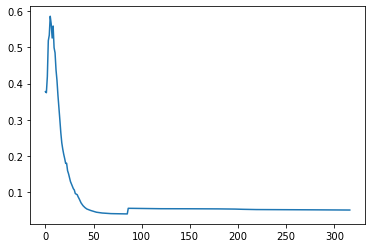

In [58]:
china_death_factor['death factor'].plot()

In [59]:
china_d_factor_stat = china_death_factor.describe().T

In [60]:
china_d_factor_stat

,count,mean,std,min,25%,50%,75%,max
death factor,317.0,0.079039,0.093227,0.040931,0.052226,0.053979,0.055232,0.585714


#### Death factor for south Korea

In [61]:
skorea_death_factor = death_factor('Korea, South')

In [62]:
skorea_death_factor.head()

,date,death factor
0,2020-01-22,NaN
1,2020-01-23,NaN
2,2020-01-24,NaN
3,2020-01-25,NaN
4,2020-01-26,NaN


In [63]:
skorea_death_factor.tail()

,date,death factor
312,2020-11-29,0.018666
313,2020-11-30,0.018514
314,2020-12-01,0.018397
315,2020-12-02,0.018317
316,2020-12-03,0.018390


<AxesSubplot:>

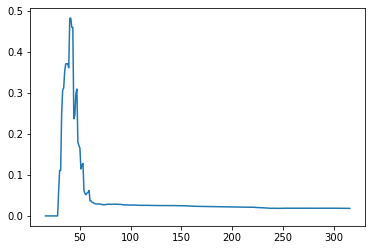

In [64]:
skorea_death_factor['death factor'].plot()

In [65]:
skorea_d_factor_stat = skorea_death_factor.describe().T

In [66]:
skorea_d_factor_stat

,count,mean,std,min,25%,50%,75%,max
death factor,301.0,0.043335,0.078956,0.0,0.018814,0.022877,0.026503,0.482759


#### Germany death factor

In [67]:
germany_death_factor = death_factor('Germany')

In [68]:
germany_death_factor.head()

,date,death factor
0,2020-01-22,NaN
1,2020-01-23,NaN
2,2020-01-24,NaN
3,2020-01-25,NaN
4,2020-01-26,NaN


In [69]:
germany_death_factor.tail()

,date,death factor
312,2020-11-29,0.021826
313,2020-11-30,0.021796
314,2020-12-01,0.021838
315,2020-12-02,0.021876
316,2020-12-03,0.021825


<AxesSubplot:>

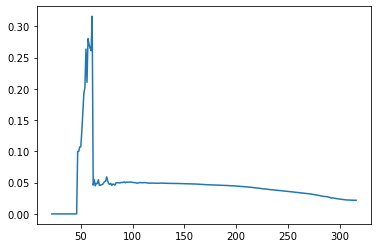

In [70]:
germany_death_factor['death factor'].plot()

In [71]:
germany_d_factor_stat = germany_death_factor.describe().T

In [72]:
germany_d_factor_stat

,count,mean,std,min,25%,50%,75%,max
death factor,295.0,0.046089,0.041486,0.0,0.032812,0.045063,0.048858,0.316195


In [73]:
# putting the summary on top of each other
stat_list = [china_d_factor_stat, skorea_d_factor_stat, germany_d_factor_stat]
summary_d_factor = pandas.concat(stat_list, ignore_index = True)

In [74]:
summary_d_factor = summary_d_factor.rename({0:'China', 1:'Korea, South', 2:'Germany'}, axis=0)

In [75]:
summary_d_factor

,count,mean,std,min,25%,50%,75%,max
China,317.0,0.079039,0.093227,0.040931,0.052226,0.053979,0.055232,0.585714
"Korea, South",301.0,0.043335,0.078956,0.000000,0.018814,0.022877,0.026503,0.482759
Germany,295.0,0.046089,0.041486,0.000000,0.032812,0.045063,0.048858,0.316195


In [76]:
import scipy.stats

#### Check if the death factor distribution is a gamma, a normal or a Poisson distribution 

In [77]:
# Let's do a test for this.
# creating a dataframe for gamma parameter
gamma_test = pandas.DataFrame()
gamma_test['lambda'] = summary_d_factor['mean'] / summary_d_factor['std']
gamma_test['alpha'] = gamma_test['lambda'] * summary_d_factor['mean']

In [78]:
gamma_test

,lambda,alpha
China,0.847819,0.067011
"Korea, South",0.548851,0.023784
Germany,1.110956,0.051203


Let's do a Kolmogorov-Smirnov test for goodness of fit.

In [79]:
gamma_test['lambda']['China']

0.8478187298439506

In [80]:
np.array(china_death_factor['death factor']).shape

(317,)

In [81]:
param = (gamma_test['lambda']['China'], gamma_test['alpha']['China'])
scipy.stats.kstest(np.array(china_death_factor['death factor']), 'gamma', param)

KstestResult(statistic=0.8790818074242948, pvalue=4.757510459324386e-291)

<b>Considering the p-value, we reject that the distribution is significantly equal to a gamma distribution</b>

In [82]:
scipy.stats.kstest(np.array(china_death_factor['death factor']), 'norm')

KstestResult(statistic=0.516324614176051, pvalue=4.797319171666111e-79)

<b>Considering the p-value, we reject that the distribution is significantly equal to a normal distribution</b>

In [83]:
scipy.stats.kstest(np.array(china_death_factor['death factor']), 'poisson', (summary_d_factor['mean']['China'],))

KstestResult(statistic=0.9240035197972389, pvalue=0.0)

<b>Considering the p-value, we also reject that the distribution is significantly equal to a Poisson distribution</b>

#### <b>We are going to use `fitter` to check the most fit distribution</b>

In [84]:
from fitter import Fitter

def fit_dist(dist):
    '''uses fitter to check the most fitted distribution
    out of the 80 in scipy.stats.
    Parameters:
    -----------
            dist: a 1-dimensional arraylike numerical data.
    Returns
    -------
        fitter.Fitter  object
    '''
    f = Fitter(np.array(dist))
    try:
        f.fit()
    except RuntimeWarning:
        pass

    return f

In [85]:
#china_fit = fit_dist(china_death_factor['death factor'])

In [86]:
#china_fit.get_best()

The last fit for China was:
{'genpareto': (1.1132995388655145, 0.04093116562870103, 0.012427833113096406)}

In [87]:
#china_fit.summary()

Let's do a Kolmogorov-Smirnov test with genpareto

In [88]:
#param = (1.1132995388655145, 0.04093116562870103, 0.012427833113096406)
#scipy.stats.kstest(np.array(china_death_factor['death factor']), 'genpareto', param)

The p-value is still too small. Let's check the case of South Korea and Germany.

In [89]:
#skorea = fit_dist(skorea_death_factor['death factor'])

In [90]:
#germany_fit = fit_dist(germany_death_factor['death factor'])

<b>The fitter test was unconclusive.</b>

#### <b>Conclusion about death factor $k$</b>

According to the statistics, $k$ should be between $0$ and $0.6$. <br>
For 75% of time the death factor should be below $0.11$ for wrost case scenario and below $0.05$ otherwise.<br>
The maximum value for the wrost day in the worst case scenario is $0.59$.<br>
The plots suggest that the death factor is high for the first 20 or 30 days then fall below $0.1$.<br>
No usual distribution (none of the 80 types in scipy.stats) fit the distribution of death factor.

## <b>Computing $S$, $I$, and $R$ for future dates and plotting the result</b>

We integrate the differential equations numerically and then plot the solutions.<br>
We use a  function with parameter $N$. For the values of $a$ and $b$ we will use the newly created data frame `df_parameters`

#### <b>We first define a plot function.</b>

In [91]:
def sir_curve(country, df_country):
    '''plots SIR curve of data in DataFrame df_country using bokeh
    Parameters:
    -----------
              country (str): name of the country
              df_country: pandas DataFrame containing the following columns
                          time, susceptible, infected, removed 
    '''
    source = ColumnDataSource(df_country)
    fig = figure(#x_axis_type='datetime',
                 plot_width=1000,
                 plot_height=600,
                 title=f'{country} SIR prediction curves',
                 x_axis_label='days',
                 y_axis_label='number of people')

    fig.title.text_font_size = '20pt'

    plot = {}
    for item, color in zip(list(df_country.columns[1:]), Spectral4):
        plot[item] = fig.line(x='time',
                                  y=item,
                                  source=source,
                                  color=color,
                                  legend_label=item,
                                  line_width=3
                                 )
        hover = HoverTool(renderers=[plot[item]],
                          tooltips=[('', 'day @time{int}'),                          
                                    ('', item),
                                    ('', '$y{int}')],
                         )
        fig.add_tools(hover)
        fig.circle(x='time',
                    y=item,
                    source=source,
                    color=color,
                    size=8
                     )
    fig.yaxis[0].formatter = NumeralTickFormatter(format='00')
    fig.legend.location = "top_left"
    fig.legend.click_policy="hide"
    show(fig)

### <b> Modelization assuming $a$ and $b$ are time dependent.</b>

In [92]:
def solve_sir_var_param(sir, max_time=df_active.shape[0], N=200000):
    ''' Generates a list of values for susceptible, infected, and removed individuals
    based on a numerical resolution of the SIR differential equation assuming that the
    infection factor a and the removal factor b are all time dependent.
    
        The values for a and b used are the one in df_parameters DataFrame
        
     Parameters:
     ----------                      
           sir (list): a 3-elements list consisting of inital values for s, i, and r
           
           max_time (int): maximum value of time (in number of days)
           
    Returns:
    --------

           df_country (pandas.DataFrame)
    '''
    
    def sir_deriv(sir, t, a, b, N):
        '''Compute the time-derivative of s, r, and i.'''
        s, i, r = sir
        return [-a*s*i/N, a*s*i/N - b*i, i*b]


    # Solve the sir differential equation    
    solution = []
    for n in range(max_time):
        t = np.linspace(n, n+1, 50)
        solution.append(integrate.odeint(sir_deriv, sir, t, args=(df_parameters['a'][n], df_parameters['b'][n], N)))
        sir = solution[n][49]
    
    #creates a pandas DataFrame out of the solution
    df_country = pandas.DataFrame()
    df_country['time'] = list(range(1, max_time+1))
    df_country['susceptible'] = [int(solution[i][49, 0]) for i in range(0, max_time)]
    df_country['infected'] = [int(solution[i][49, 1]) for i in range(0, max_time)]
    df_country['removed']  = [int(solution[i][49, 2]) for i in range(0, max_time)]
    return df_country

In [93]:
test_df = solve_sir_var_param([199879, 61, 61])

In [94]:
test_df

,time,susceptible,infected,removed
0,1,199877,62,61
1,2,199871,66,63
2,3,199867,67,66
3,4,199859,71,69
4,5,199851,76,73
...,...,...,...,...
312,313,104079,7259,88662
313,314,103781,7136,89083
314,315,102845,7947,89207
315,316,102751,7614,89634


In [95]:
#cases = test_df['infected'][0]
#active = test_df['infected'][0]
#total_list = [test_df['infected'][0]]
#active_list = [test_df['infected'][0]]
#for i in range(1,test_df['infected'].shape[0]):
#        cases += test_df['infected'][i]
#        total_list.append(cases)
#        active =  test_df['infected'][i]\
#                  + active_list[i-1]\
#                  - test_df['removed'][i]
#        active_list.append(active)
#        
#test_df['total cases'] = total_list
#test_df['active cases'] = active_list

In [96]:
test_df

,time,susceptible,infected,removed
0,1,199877,62,61
1,2,199871,66,63
2,3,199867,67,66
3,4,199859,71,69
4,5,199851,76,73
...,...,...,...,...
312,313,104079,7259,88662
313,314,103781,7136,89083
314,315,102845,7947,89207
315,316,102751,7614,89634


#### Negative active case does not make sens so we are going to truncate the data and limit to a 30 days forecast

In [97]:
test_df_trunc = test_df.truncate(after=30)

In [98]:
test_df_trunc

,time,susceptible,infected,removed
0,1,199877,62,61
1,2,199871,66,63
2,3,199867,67,66
3,4,199859,71,69
4,5,199851,76,73
5,6,199848,76,76
6,7,199841,71,87
7,8,199840,66,94
8,9,199833,70,97
9,10,199825,73,102


In [99]:
sir_curve('test', test_df_trunc.drop('susceptible', axis=1))

### <b> Modelization assuming $a$ and $b$ are constant.</b>

In this part we assume $a$ and $b$ are constant and we are going to use the values stored in `sir_parameter` 

In [100]:
sir_parameter

{'a mean': 0.12195870908401499,
 'a std': 0.09751332903244213,
 'b mean': 0.05479558002430622,
 'b std': 0.042923182076842474}

In [101]:
def solve_sir_simple(sir, max_time, a=0.13, b=0.064, N=2000000):
    ''' Solve the sir
     Parameters:
     ----------           
           a (float): infection rate
           
           b (float): removal rate
           
           sir (list): a 3-elements list consisting of inital values for s, i, and r
           
           max_time (int): maximum value of time (in number of days)
           
    Returns:
    --------

           df_country (pandas.DataFrame)
    '''
    
    def sir_deriv(sir, t, a, b, N):
        '''Compute the time-derivative of s, r, and i.'''
        s, i, r = sir
        return [-a*s*i/N, a*s*i/N - b*i, i*b]


    # Solve for i (infection)
    t = np.linspace(0, max_time, 50*max_time)
    solution = integrate.odeint(sir_deriv, sir, t, args=(a, b, N))
    
    #creates a pandas DataFrame out of the solution
    df_country = pandas.DataFrame()
    df_country['time'] = list(range(1, max_time+1))
    df_country['susceptible'] = [solution[i, 0] for i in range(0, 50*max_time, 50)]
    df_country['infected'] = [solution[i, 1] for i in range(0, 50*max_time, 50)]
    df_country['removed']  = df_country['susceptible'].apply(lambda x: sir[0]-x)
    
    #df_country['removed'] = [solution[i, 2] for i in range(0, 50*max_time, 50)]
    return df_country

In [102]:
df_country = solve_sir_simple([2000000, 61, 61], 30)

In [103]:
df_country.head()

,time,susceptible,infected,removed
0,1,2.000000e+06,61.000000,0.000000
1,2,1.999992e+06,65.164681,8.203176
2,3,1.999983e+06,69.613661,16.966373
3,4,1.999974e+06,74.366343,26.327813
4,5,1.999964e+06,79.443451,36.328329


In [104]:
sir_curve('test', df_country.drop('susceptible', axis=1))

#### <b>Allowing user to change the values of $a$ and $b$,  $a$ and $b$ are still constant.</b>

In [105]:
parameter_stat

,a mean,a std,b mean,b std
China,0.131978,0.093778,0.065042,0.049715
"Korea, South",0.111940,0.101248,0.044549,0.036132
Germany,0.154809,0.187813,0.062944,0.165694


In [106]:
def plot_prediction(max_time, a=0.13, b=0.064, i=1, N=3000000):
        df_country = solve_sir_simple([N-i, i, 0], max_time, a, b, N)
        df_country = df_country.drop('susceptible', axis=1)
        source = df_country
        sir_curve('Prediction', df_country)
        push_notebook()


In [107]:
interact(plot_prediction, max_time=(7,160,1), a=(0.1, 0.9, 0.01), b=(0.02, 0.8, 0.01), i=(1, 2500, 1), N=3000000)

interactive(children=(IntSlider(value=83, description='max_time', max=160, min=7), FloatSlider(value=0.13, des…

<function __main__.plot_prediction(max_time, a=0.13, b=0.064, i=1, N=3000000)>

## <b>Taking death factor into consideration</b>

<b>We split $R$ into $R = H + D$ where $D= k R$</b>

In [108]:
def prediction_with_death(max_time, a=0.12, b=0.06, i=1, N=3000000, k=0.001):
        df_country = solve_sir_simple([N-i, i, 0], max_time, a, b, N)
        df_country = df_country.drop('susceptible', axis=1)
        df_country['deaths'] = k * df_country['removed']
        df_country['recovered'] = (1-k) * df_country['removed']
        df_country = df_country.drop('removed', axis=1)
        source = df_country
        sir_curve('Prediction', df_country)
        output_notebook()
        push_notebook()


In [109]:
interact(prediction_with_death, max_time=(7,180,1), a=(0.1, 0.9, 0.01), b=(0.02, 0.8, 0.01), i=(1, 2500, 1), N=300000, k=(0, 0.20,0.0001))

interactive(children=(IntSlider(value=93, description='max_time', max=180, min=7), FloatSlider(value=0.12, des…

<function __main__.prediction_with_death(max_time, a=0.12, b=0.06, i=1, N=3000000, k=0.001)>